# **CS 210-Data Science Term Project**

by Altılı Masa:Alkım Özyüzer, Elif Öztürk, Görkem Afşin, Mehmet Aldemir, Can Derin Tümay & Teoman Doğan



## **1-Research and Findings About the Car Market in Turkey**


For this project, have analyzed a dataset regarding the car market in Turkey.

Hypothesis: *The price of cars in the Turkey car market is influenced by several factors such as brand, model year, vehicle type and color and predictive models can be used to predict car prices based on these factors.*

Research Question: How these features affect the car prices in Turkey market?


## **2-Information About Data Source**

We found our data from Kaggle and it is originally from a website called “Sahibinden.com”. The data contains real prices of cars in Turkey market. There are several features in this data such as Date, Brand, Type of car, Model Year and Price. In this part, we also provided some statistics about the data.

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CS210 Term Project/turkey_car_market.csv')
df.info()

In [ ]:
df.head()

,İlan Tarihi,Marka,Arac Tip Grubu,Arac Tip,Model Yıl,Yakıt Turu,Vites,CCM,Beygir Gucu,Renk,Kasa Tipi,Kimden,Durum,Km,Fiyat
0,27/05/2020,Jaguar,XF,2.0 D Prestige Plus,2017.0,Dizel,Otomatik Vites,1801-2000 cc,176-200 BG,Lacivert,Hatchback 5 Kapı,Galeriden,2. El,26100,634500
1,16/06/2020,Acura,CL,-,2015.0,Dizel,Yarı Otomatik Vites,1301-1600 cc,101-125 BG,Mavi,Sedan,Sahibinden,2. El,127000,151500
2,14/06/2020,Acura,CL,2.2,1994.0,Benzin/LPG,Düz Vites,1301-1600 cc,101-125 BG,Turkuaz,Sedan,Sahibinden,2. El,175000,19750
3,11/06/2020,Acura,CL,-,2013.0,Dizel,Düz Vites,1301-1600 cc,76-100 BG,Kahverengi,Sedan,Sahibinden,2. El,325,52000
4,11/06/2020,Acura,CL,2.2,2010.0,Dizel,Otomatik Vites,1801-2000 cc,151-175 BG,Beyaz,Sedan,Sahibinden,2. El,207000,148750


In [ ]:
df.describe()

,Model Yıl,Km,Fiyat
count,7450.000000,7.450000e+03,7.450000e+03
mean,2011.354631,1.348014e+05,1.513454e+05
std,6.912015,9.552888e+04,2.322973e+05
min,1959.000000,0.000000e+00,5.500000e+03
25%,2008.000000,6.405900e+04,6.150000e+04
50%,2013.000000,1.220000e+05,9.837500e+04
75%,2016.000000,1.940000e+05,1.575000e+05
max,2020.000000,1.850000e+06,5.086500e+06


## **3-Data Cleaning and Preprocessing**
In our data analysis, we began by employing the isnull() library to detect any missing values in our dataset. Fortunately, our investigation revealed that no data values were missing. Additionally, we conducted a thorough examination for duplicates and identified a total of 1594 duplicate columns. To ensure the accuracy of our analysis, we promptly eliminated these duplicates from the dataset.

Next, we proceeded to transform the categorical variables into a numerical format suitable for machine learning models. To achieve this, we specifically focused on the columns 'Arac Tip Grubu', 'Marka', 'Yakıt Turu', and 'Model Yıl'. To prepare these columns for encoding, we utilized the OneHotEncoder class, and through the fit() method, the encoder learned the unique categories and their respective numerical representations for each selected column. By performing this encoding, we obtained a transformed dataset that facilitated further analysis and model training.

Moreover, we leveraged the ColumnTransformer() function in our code, which allowed us to apply diverse transformations to distinct column types. In particular, we employed the StandardScaler() transformation on the numerical column 'Km'. This transformation standardizes the values, giving them a mean of 0 and a standard deviation of 1. By scaling the numerical column, we ensured its compatibility with the rest of the dataset and enhanced the accuracy of our subsequent analyses.

In [47]:
# Check if any values are missing in the entire dataset
if df.isnull().values.any():
    print('There are missing values in the dataset')
else:
    print('There is no missing value in the dataset')

# Check if any values are missing in each column
missing_values = df.isnull().sum()
print(missing_values)

#checking num_duplicates
num_duplicates = df.duplicated().sum()
print("Number of duplicates before dropping:", num_duplicates)

df.drop_duplicates(inplace=True)

num_duplicates = df.duplicated().sum()
print("Number of duplicates after dropping:", num_duplicates)

There is no missing value in the dataset
İlan Tarihi       0
Marka             0
Arac Tip Grubu    0
Arac Tip          0
Model Yıl         0
Yakıt Turu        0
Vites             0
CCM               0
Beygir Gucu       0
Renk              0
Kasa Tipi         0
Kimden            0
Durum             0
Km                0
Fiyat             0
dtype: int64
Number of duplicates before dropping: 0
Number of duplicates after dropping: 0


## **4-DATA ANALYSIS**

In order to obtain comprehensive understanding of the data and its features, we conducted a general analysis of the dataset before interpreting the potential impact of different features, and checking for our hypotesis. So let's dig in to the visualization of the Turkey's car market data and better understand the content:

**Top Color Preferences:**
-  As the title suggests, this observation provides insigtful information about the color preferences of the car market in Turkey.
-  Might affect the market demand which could straightforward impact the car prices.
- Visualization indicates higher demand for white-colored cars by far.

**Mean Price by Model Year for Popular Brands:**
- This examination is conducted so we could identify if there are any trends considering the model year of the car.
- Provides understanding of varying prices related to model years.
- For instance, we can detect the price anomaly of Opel vehicles before 90s, and not be certain that brand new vehicles are more pricy compared to the older models.

**Mean Price of Most Expensive Brands:**
- This analysis studies whether there is a correlation between the manufacturer and the prices for the vehicles.
- Could also lead us to answers regarding the effect of brand value to the pricing of luxury brands.



**Projected Price Change of BMW vehicles:**
- This visualization aims to observe and diagnose the potential pattern the price observations can exhibit. 
- It attempts to identify the price trend and predict potential price shifts by fitting a polinomial curve with historical data.
- Provides insights of potential price fluctuations of BMW vehicles over time.

















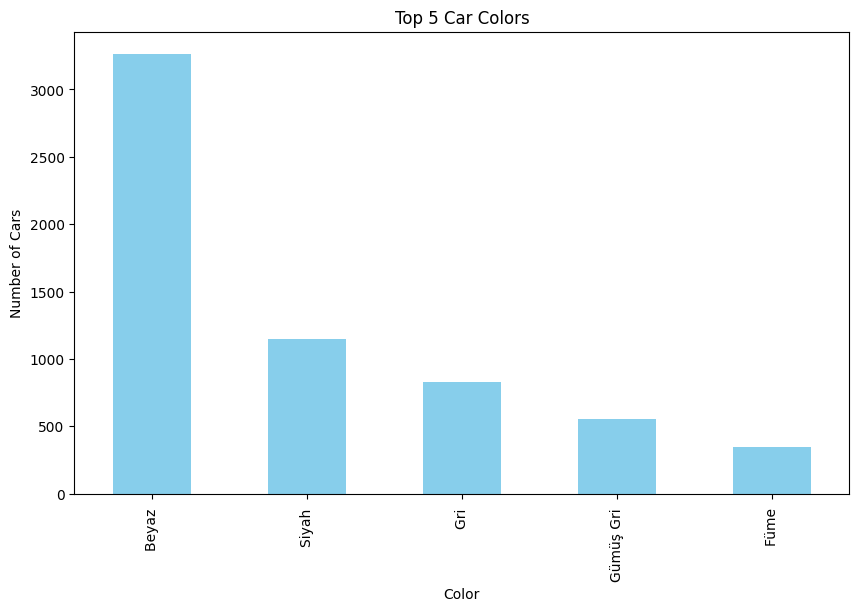

In [ ]:
#Find the top 5 most popular color in car selection in Turkey

import matplotlib.pyplot as plt

color_counts = df['Renk'].value_counts().nlargest(5)
plt.figure(figsize=(10,6))
color_counts.plot(kind='bar', color='skyblue')
plt.title('Top 5 Car Colors')
plt.xlabel('Color')
plt.ylabel('Number of Cars')

plt.show()


Renault    965
Fiat       649
Opel       645
Ford       600
Hyundai    578
Name: Marka, dtype: int64


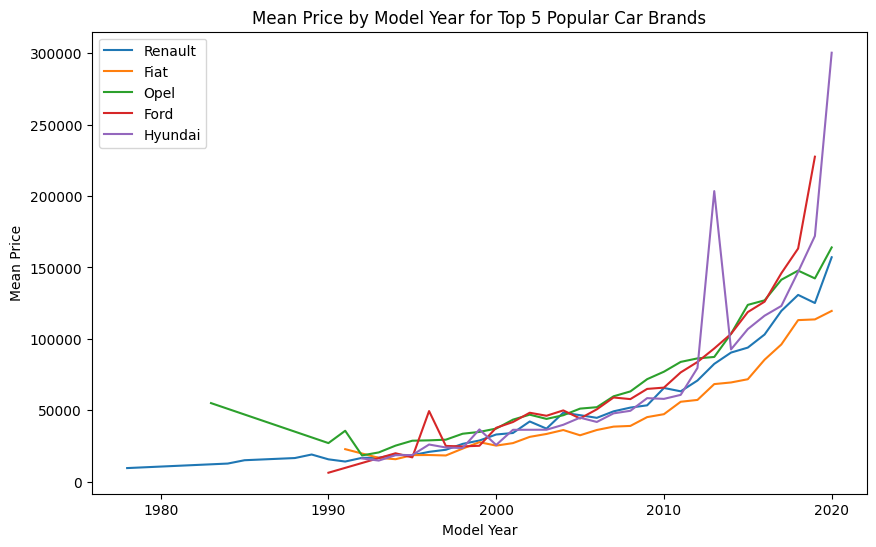

In [ ]:
#Mean Price by Model Year for Top 5 Popular Car Brands

import matplotlib.pyplot as plt

#Find the top 5 most popular car models in Turkey

top_brands = df['Marka'].value_counts().head(5)
print(top_brands)

#Calculate the mean price by "Model Year" for top 5 Popular Car Models
top_5_brands = df['Marka'].value_counts().index[:5]

plt.figure(figsize=(10,6))

for brand in top_5_brands:
    brand_data = df[df['Marka'] == brand]
    mean_prices = brand_data.groupby('Model Yıl')['Fiyat'].mean()
    plt.plot(mean_prices.index, mean_prices.values, label=brand)

plt.title('Mean Price by Model Year for Top 5 Popular Car Brands')
plt.xlabel('Model Year')
plt.ylabel('Mean Price')
plt.legend()
plt.show()



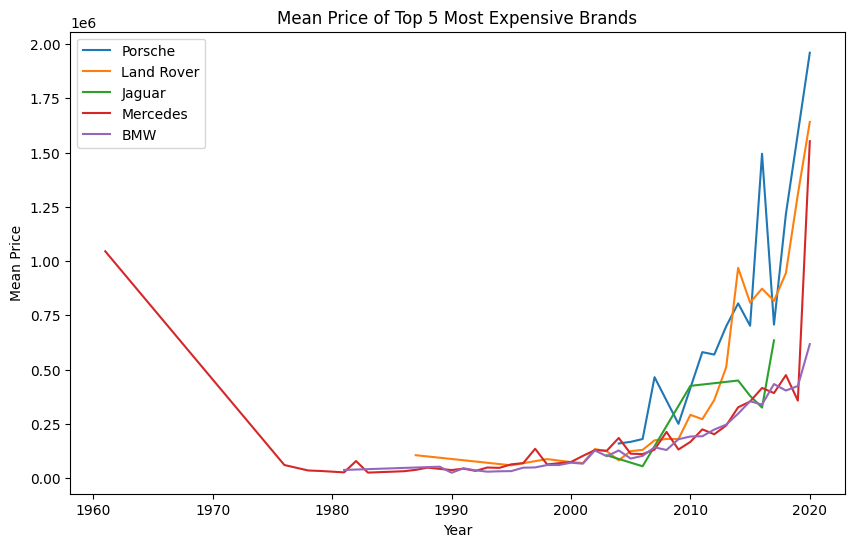

In [ ]:
## Mean Price of Top 5 Most Expensive Brands

brand_mean_prices = df.groupby('Marka')['Fiyat'].mean()
plt.figure(figsize=(10,6))
brand_car_counts = df['Marka'].value_counts()

# Select the cars which have more than 10 cars
valid_brands = brand_car_counts[brand_car_counts > 10].index
valid_brand_mean_prices = brand_mean_prices[valid_brands]

# Determine the top 5 brand which has highest mean price
top5_brands = valid_brand_mean_prices.nlargest(5).index

# Filter the df according to this top 5 brands
df_top5 = df[df['Marka'].isin(top5_brands)]

#Group by brand, take the average
grouped = df_top5.groupby(['Marka', 'Model Yıl'])['Fiyat'].mean().reset_index()

# Plotting
for brand in top5_brands:
    data = grouped[grouped['Marka'] == brand]
    plt.plot(data['Model Yıl'], data['Fiyat'], label=brand)

plt.xlabel('Year')
plt.ylabel('Mean Price')
plt.title('Mean Price of Top 5 Most Expensive Brands')

plt.legend()
plt.show()


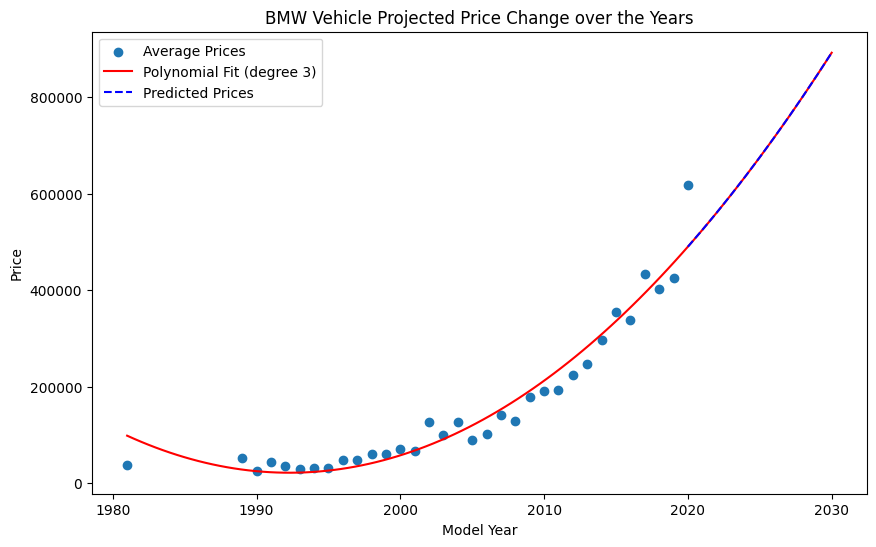

In [ ]:
##Prediction of the change in price for the next 10 years for BMW brand

import numpy as np
from scipy.optimize import curve_fit

bmw_df = df[df['Marka'] == 'BMW']

average_prices = bmw_df.groupby('Model Yıl')['Fiyat'].mean().reset_index()

# Polynomial function
def polynomial_function(x, a, b, c):
    return a * x**3 + b * x**2 + c

# x and y values for fitting
x = average_prices['Model Yıl']
y = average_prices['Fiyat']

# Curve fitting
params, _ = curve_fit(polynomial_function, x, y)
a_fit, b_fit, c_fit = params
plt.figure(figsize=(10, 6)) 
plt.scatter(x, y, label='Average Prices')

# 2030'a kadar olan veriler
x_fit = np.linspace(min(x), 2030, 100)
plt.plot(x_fit, polynomial_function(x_fit, a_fit, b_fit, c_fit), color='red', label='Polynomial Fit (degree 3)')

# Prediction for the next 10 years
x_predict = np.arange(2020, 2031)
y_predict = polynomial_function(x_predict, a_fit, b_fit, c_fit)
plt.plot(x_predict, y_predict, color='blue', linestyle='--', label='Predicted Prices')

plt.xlabel('Model Year')
plt.ylabel('Price')
plt.title('BMW Vehicle Projected Price Change over the Years')
plt.legend()
plt.show()


# *4.1-Interpretation*

In this part, we will investigate the effects of several features to the prices of cars in Turkey:

* Model Year: The visualization confirms that newer cars have higher prices. Classic cars from 1960 also have high demand, indicating their higher value. But in general, we can say that the model year directly influences the car price.

* Mileage: The plot shows that as the kilometers driven increases, car prices decrease. This relationship makes sense since car performance typically decreases as mileage increases. Therefore, we can conclude that mileage is an important factor that affects the price of a car.

* Fuel Type: Electric cars have the highest average price, followed by hybrid cars. The advanced technology required to produce these cars explains the price difference. Thus, fuel type is another factor that influences the car price.

* Color: Mean prices for the top five most frequent colors show that black cars have a higher mean price compared to other colors. However, the mean prices of other colors are relatively close. This suggests that black may be a popular color in the market, but it is not clear if color directly affects the car price as it may be a matter of personal preference.

* Brand: The graph indicates that the brand of a car directly affects its price. Brands with a high reputation and reliability tend to have higher prices. Top brands often provide advanced technology and higher-quality features, justifying their higher car prices.


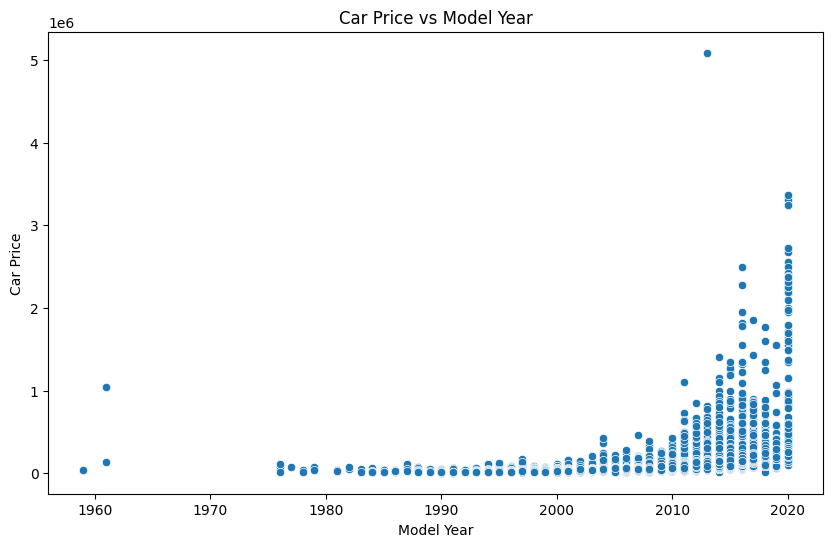

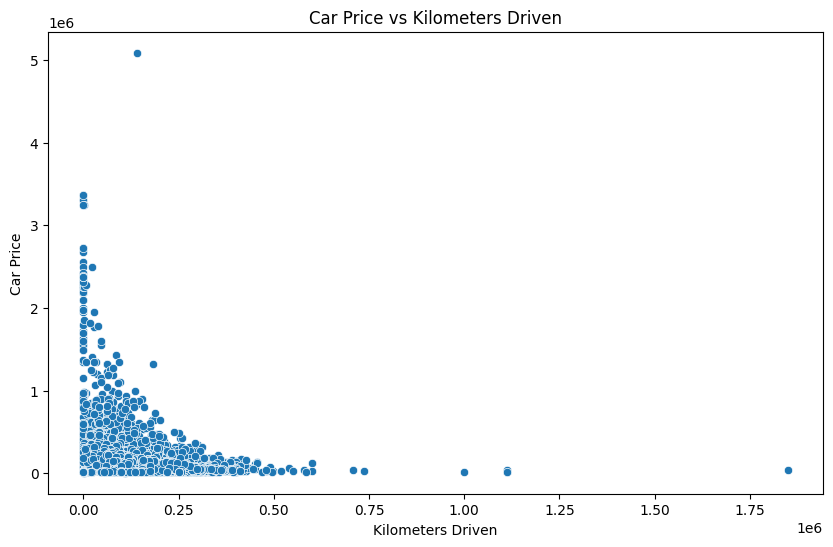

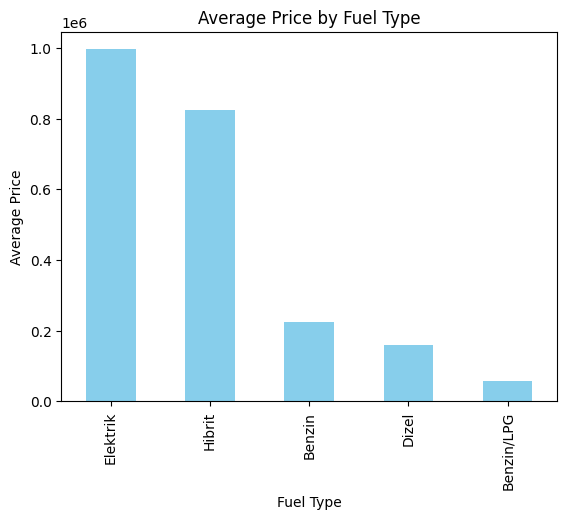

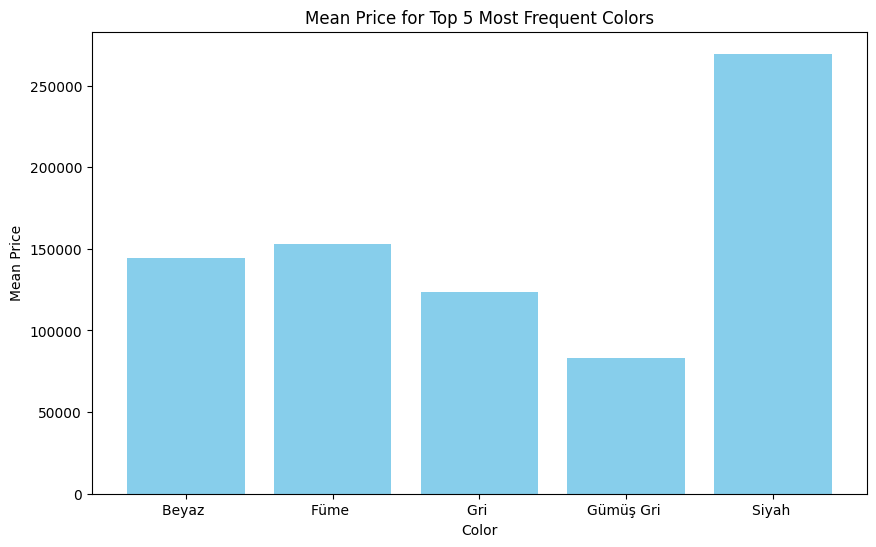

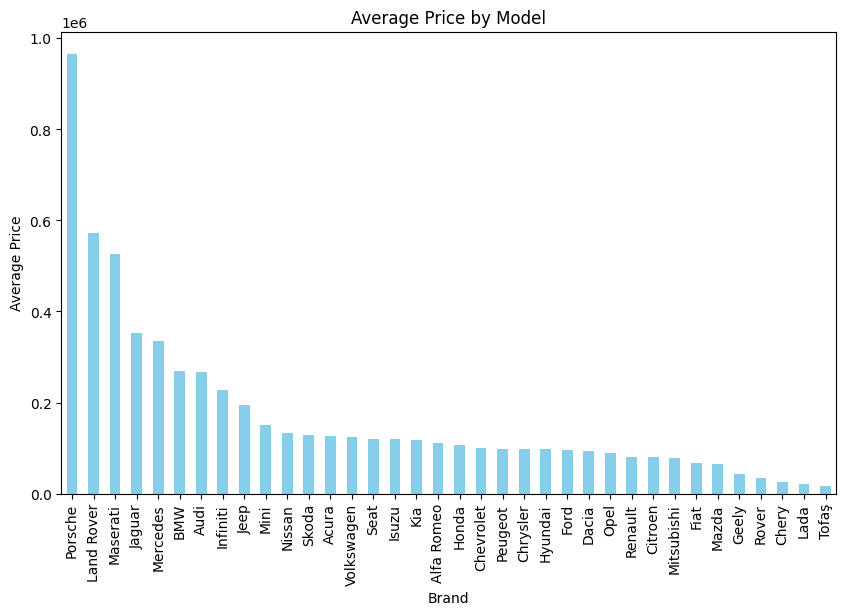

In [ ]:
import seaborn as sns

# Create a scatter plot of 'Model Yıl' vs 'Fiyat'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Model Yıl', y='Fiyat', data=df)
plt.title('Car Price vs Model Year')
plt.xlabel('Model Year')
plt.ylabel('Car Price')
plt.show()

# Create a scatter plot of 'Km' vs 'Fiyat'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Km', y='Fiyat', data=df)
plt.title('Car Price vs Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Car Price')
plt.show()

# Calculate average price for each fuel type
avg_price_per_fueltype = df.groupby('Yakıt Turu')['Fiyat'].mean().sort_values(ascending=False)

avg_price_per_fueltype.plot(kind='bar', color='skyblue')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')
plt.title('Average Price by Fuel Type')
plt.show()

# Top 5 most frequent colors
top_colors = df['Renk'].value_counts().nlargest(5).index

# Filter the dataframe to include only those colors
top_colors_df = df[df['Renk'].isin(top_colors)]

# Group by color and calculate mean price
mean_prices = top_colors_df.groupby('Renk')['Fiyat'].mean()

plt.figure(figsize=(10, 6))
plt.bar(mean_prices.index, mean_prices.values, color='skyblue')
plt.xlabel('Color')
plt.ylabel('Mean Price')
plt.title('Mean Price for Top 5 Most Frequent Colors')
plt.show()

# Calculate average price for each brand
avg_price_per_fueltype = df.groupby('Marka')['Fiyat'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
avg_price_per_fueltype.plot(kind='bar', color='skyblue')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.title('Average Price by Model')
plt.show()




## **5-Model Prediction by using Linear Regression**


In this part, we will predict the prices of cars by using Linear Regression model which is a type of supervised learning. For the model:

* Our target variable is the 'Fiyat' column, which represents the price of a 
vehicle. The goal is to develop a model that can accurately predict the price based on various features.

* To assess the performance of our model, we split the data into training and test sets. This was accomplished using the train_test_split function from scikit-learn. We randomly assigned 80% of the data to the training set and 20% to the test set.

* We considered several features to predict the car prices such as the type of the car,brand, leverage(km),the year of the model and the car type group of the model. We did not use color since it has no significant impact on car prices.

* To deal with categorical columns, we employed the ColumnTransformer and OneHotEncoder from scikit-learn to handle this. Categorical columns ('Arac Tip Grubu', 'Marka', 'Yakıt Turu', 'Model Yıl', 'Arac Tip') were passed to the OneHotEncoder during the preprocessing step. This encoding converted the categorical values into numerical features using binary vectors.

* To ensure proper scaling of numerical features, we used the StandardScaler from scikit-learn. This was applied to the 'Km' feature, which was included in the dataset. Scaling the features helps prevent any particular feature from dominating the learning process and ensures that all features contribute equally.

We employed the LinearRegression algorithm from scikit-learn to create our linear regression model. The r2_score of the model found as %88 which suggests that our model captures a significant portion of the price variation.


In [ ]:
X= df.drop(columns='Fiyat')
y = df['Fiyat']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size = 0.2,random_state = 81)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
ohe = OneHotEncoder()
ohe.fit(X[['Arac Tip Grubu','Marka','Yakıt Turu','Model Yıl','Arac Tip']])


OneHotEncoder()

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Km']),  #sayısal olduğu için standardscaler
        ('cat', OneHotEncoder(categories = ohe.categories_), ['Arac Tip Grubu','Marka','Yakıt Turu','Model Yıl','Arac Tip'])# Kategorileri one-hot encode'la(kategori olduğu için)
    ])
lr = LinearRegression()
pipe = make_pipeline(preprocessor,lr)
pipe.fit(X_train,y_train)



Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Km']),
                                                 ('cat',
                                                  OneHotEncoder(categories=[array(['1 Serisi', '100 Serisi', '106', '11', '1100', '113', '12', '1201',
       '1310', '14', '145', '147', '15', '156', '159', '16', '17', '180',
       '180 SLC', '19', '190', '2 Serisi', '200', '200 D', '200 E',
       '2008', '206', '206 + (Plus)', '207', '208', '21', '...
       1993., 1994., 1995., 1996., 1997., 1998., 1999., 2000., 2001.,
       2002., 2003., 2004., 2005., 2006., 2007., 2008., 2009., 2010.,
       2011., 2012., 2013., 2014., 2015., 2016., 2017., 2018., 2019.,
       2020.]),
                                                                            array(['-', '0.9\n', '0.9 Icon', ..., 'Z4 3.0i sDrive', 'll 2.0 Si4 SE',
       'Şahin 5 vites'], dtype=object)]),
                                                  ['Arac Tip Grubu', 'Marka',
                                                   'Yakıt Turu', 'Model Yıl',
                                                   'Arac Tip'])])),
                ('linearregression', LinearRegression())])

In [ ]:
# Get transformed features separately
km_transformed = preprocessor.named_transformers_['num'].transform(X_train[['Km']])  # note that it needs a DataFrame, not a Series
cat_transformed = preprocessor.named_transformers_['cat'].transform(X_train[['Arac Tip Grubu','Marka','Yakıt Turu','Model Yıl','Arac Tip']])

# Concatenate transformed features (note that .toarray() is used to convert the sparse matrix to a normal (dense) numpy array)
X_transformed = np.concatenate([km_transformed, cat_transformed.toarray()], axis=1)

# Get feature names after transformation
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(input_features=['Arac Tip Grubu','Marka','Yakıt Turu','Model Yıl','Arac Tip'])
all_feature_names = np.concatenate([['Km'], ohe_feature_names])

# Convert to DataFrame
df_transformed = pd.DataFrame(X_transformed, columns=all_feature_names)

print(df_transformed.head())



         Km  Arac Tip Grubu_1 Serisi  Arac Tip Grubu_100 Serisi  \
0 -0.792719                      0.0                        0.0   
1  1.208167                      0.0                        0.0   
2  0.451234                      0.0                        0.0   
3 -0.455809                      0.0                        0.0   
4  0.064438                      0.0                        0.0   

   Arac Tip Grubu_106  Arac Tip Grubu_11  Arac Tip Grubu_1100  \
0                 0.0                0.0                  0.0   
1                 0.0                0.0                  0.0   
2                 0.0                0.0                  0.0   
3                 0.0                0.0                  0.0   
4                 0.0                0.0                  0.0   

   Arac Tip Grubu_113  Arac Tip Grubu_12  Arac Tip Grubu_1201  \
0                 0.0                0.0                  0.0   
1                 0.0                0.0                  0.0   
2          

In [ ]:
y_pred = pipe.predict(X_test)
r2_score(y_test,y_pred)

0.8882123290978043

In [ ]:
##To find the highest possible r2_score
scores = []
for i in range(100):
  X_train,X_test,y_train,y_test= train_test_split(X,y,test_size = 0.2,random_state = i)
  lr = LinearRegression()
  pipe = make_pipeline(preprocessor,lr)
  pipe.fit(X_train,y_train)
  y_pred = pipe.predict(X_test)
  scores.append([r2_score(y_test,y_pred),i])

In [ ]:
scores

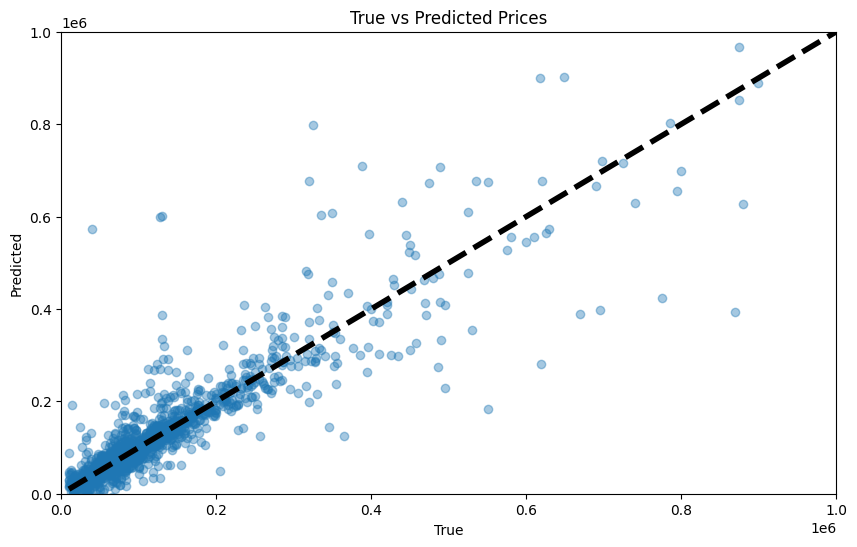

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('True vs Predicted Prices')
plt.xlim(0, 1000000)
plt.ylim(0, 1000000)
plt.show()
